<a href="https://colab.research.google.com/github/April03exo/BSIS-2A_RAPANUT-APRIL-JOY-V./blob/main/Multi_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/April03exo/BSIS-2A_RAPANUT-APRIL-JOY-V./refs/heads/main/Student_Performance.csv')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
X_simple = df[['Performance Index', 'Hours Studied']]
y = df['Previous Scores']

model_multi = LinearRegression()
model_multi.fit(X_simple, y)

print("Intercept: ", model_multi.intercept_)
print("Coefficients: ", model_multi.coef_)

Intercept:  29.924055132069306
Coefficients:  [ 0.965123   -2.75933418]


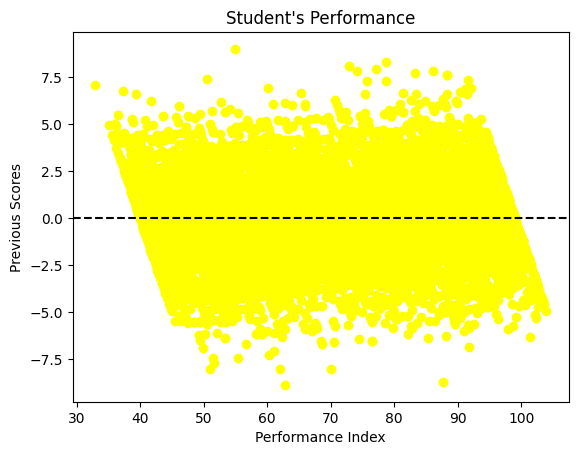

In [ ]:
from scipy.stats import probplot

y_pred_multi = model_multi.predict(X_simple)
hours = y - y_pred_multi

plt.scatter(y_pred_multi, hours, color = "yellow")
plt.axhline(0, color = "black", linestyle= "--")
plt.xlabel("Performance Index")
plt.ylabel("Previous Scores")
plt.title("Student's Performance")

plt.show()

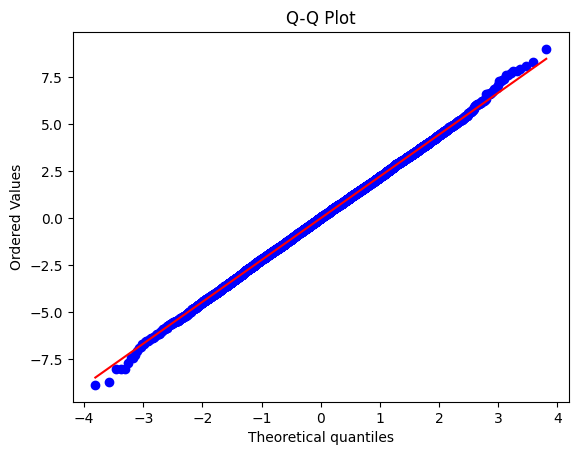

In [ ]:
probplot(hours, dist = "norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

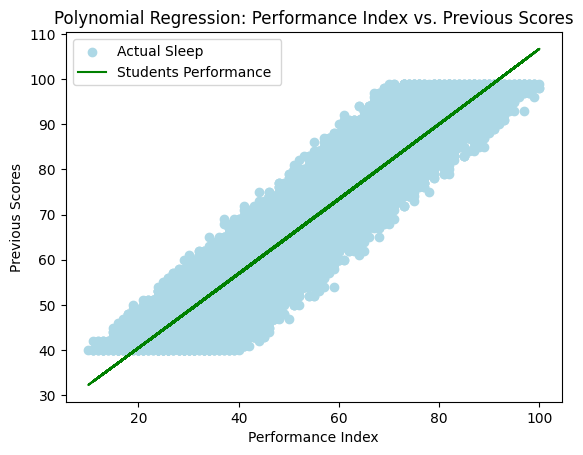

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[["Performance Index"]])
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)
plt.scatter(df["Performance Index"], df["Previous Scores"], color="lightblue", label="Actual Sleep")
plt.plot(df["Performance Index"], y_pred_poly, color="green", label="Students Performance ")
plt.xlabel("Performance Index")
plt.ylabel("Previous Scores")
plt.title("Polynomial Regression: Performance Index vs. Previous Scores")
plt.legend()
plt.show()